In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.datasets import make_regression
from sklearn.pipeline import make_pipeline


from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

from sklearn.model_selection import (cross_val_score, train_test_split, KFold, GridSearchCV)

In [4]:
df = pd.read_csv('Players.csv')

In [5]:
df.rename(columns={'Unnamed: 0':'Players Name'},inplace=True)

In [6]:
df

Players Name  Over_All  ball_skills   physical  defence  \
0                  Lionel Messi        93         96.0  80.857143     27.5   
1            Robert Lewandowski        92         86.5  80.285714     38.5   
2                 Kylian Mbappé        91         92.0  87.428571     30.0   
3                     Jan Oblak        91         21.0  59.428571     19.5   
4               Kevin De Bruyne        91         89.5  76.428571     66.5   
...                         ...       ...          ...        ...      ...   
1195  André-Franck González Rey        76         81.0  78.285714     74.5   
1196              Lucas Tousart        76         65.5  69.714286     77.5   
1197          Frédéric Guilbert        76         68.5  74.714286     74.0   
1198         Jeremiah St. Juste        76         74.0  79.285714     78.5   
1199           Gonzalo Martínez        76         81.5  77.142857     37.5   

        GK     mental  shooting    passing  hight  wight  age        value  
0     10.8  77.000000    86.875  89.000000    170     72   34   78000000.0  
1     10.2  81.166667    88.125  75.333333    185     81   33  119500000.0  
2      8.4  75.833333    80.500  78.000000    182     73   22  194000000.0  
3     87.4  47.500000    18.500  32.000000    188     87   28  112000000.0  
4     11.2  84.000000    81.500  93.666667    181     70   30  125500000.0  
...    ...        ...       ...        ...    ...    ...  ...          ...  
1195  10.0  77.000000    61.125  69.666667    184     78   25   10500000.0  
1196  13.4  69.166667    53.875  68.666667    185     83   24   10500000.0  
1197  11.6  70.166667    50.625  70.333333    178     78   26    9000000.0  
1198  11.8  69.833333    53.375  70.000000    184     74   24    9500000.0  
1199  11.0  63.000000    69.625  72.000000    172     75   28    7500000.0  

[1200 rows x 13 columns]

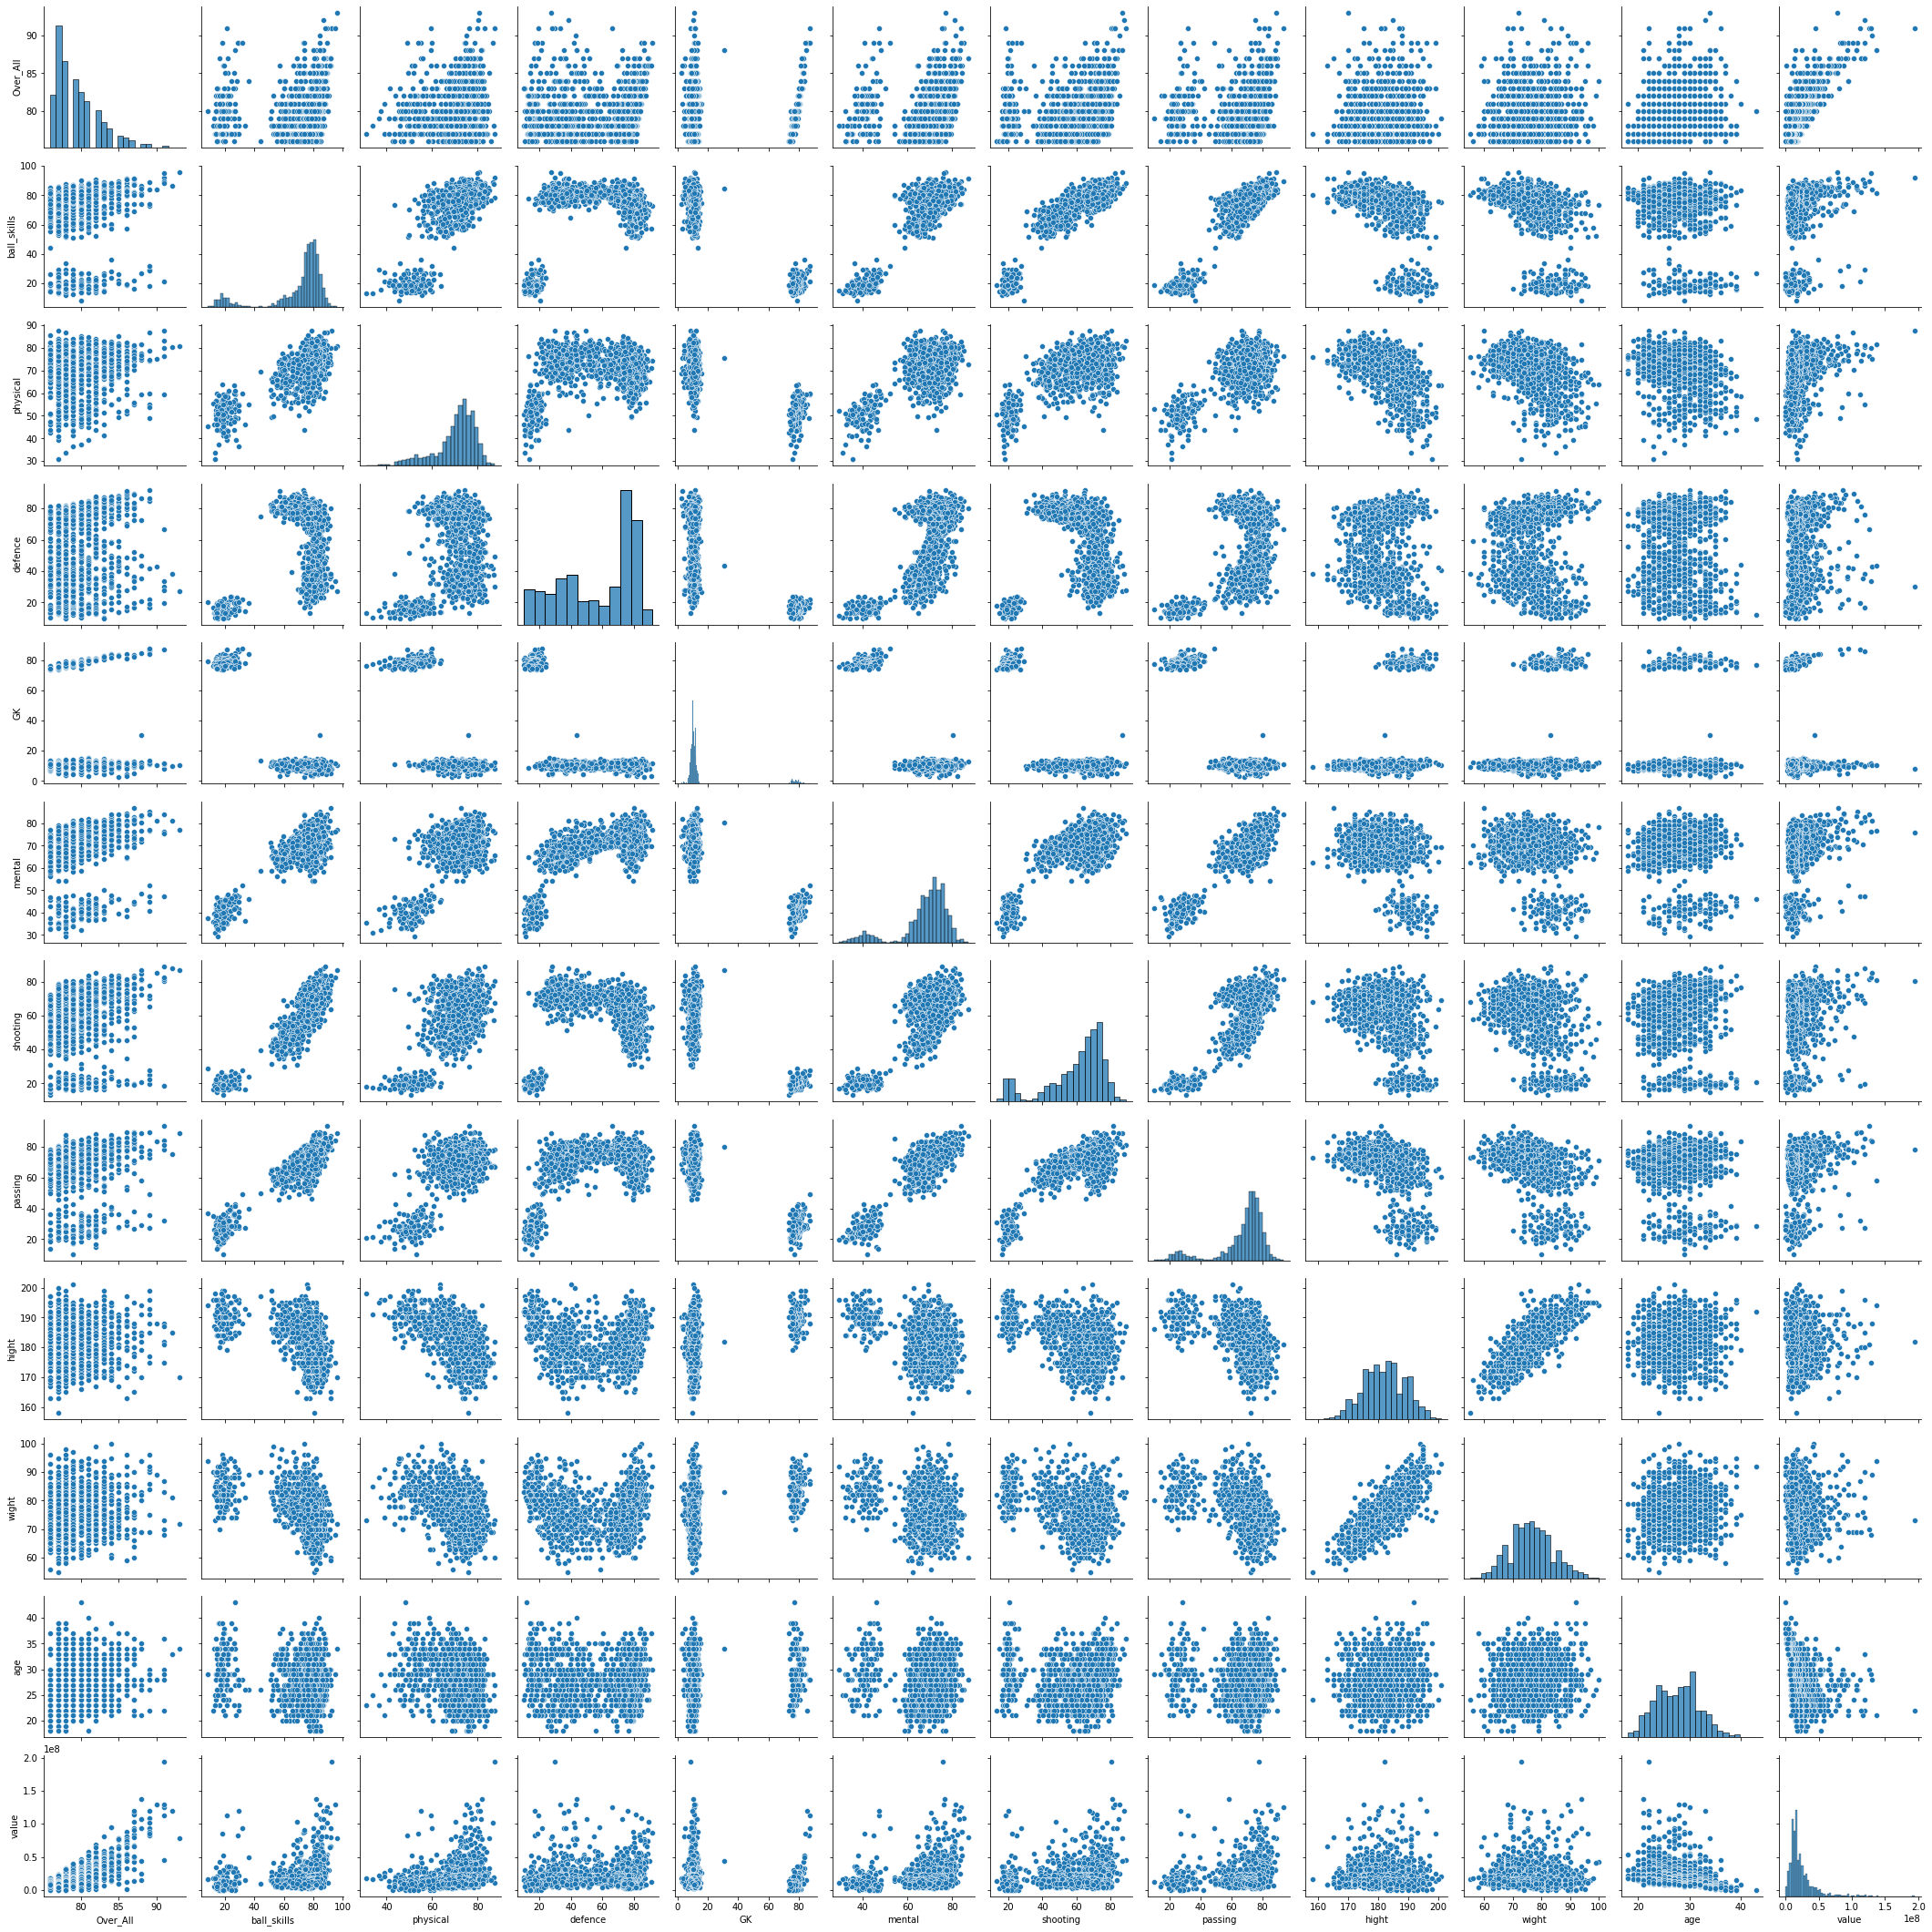

In [7]:
sns.pairplot(df)

# PART 1 - CLEANING THE DATA & CORRELATION.


WE CLEANED OUR DATA.


In [8]:


df['value'] = np.log(df['value'])

v= df["value"].mean()

df = df.fillna(value=v)

mask_df = df[ (df['ball_skills'] > 65)]

mask_df.set_index('Players Name')

Over_All  ball_skills   physical  defence    GK  \
Players Name                                                                 
Lionel Messi                     93         96.0  80.857143     27.5  10.8   
Robert Lewandowski               92         86.5  80.285714     38.5  10.2   
Kylian Mbappé                    91         92.0  87.428571     30.0   8.4   
Kevin De Bruyne                  91         89.5  76.428571     66.5  11.2   
Neymar Jr                        91         95.0  80.000000     33.5  11.8   
...                             ...          ...        ...      ...   ...   
André-Franck González Rey        76         81.0  78.285714     74.5  10.0   
Lucas Tousart                    76         65.5  69.714286     77.5  13.4   
Frédéric Guilbert                76         68.5  74.714286     74.0  11.6   
Jeremiah St. Juste               76         74.0  79.285714     78.5  11.8   
Gonzalo Martínez                 76         81.5  77.142857     37.5  11.0   

                              mental  shooting    passing  hight  wight  age  \
Players Name                                                                   
Lionel Messi               77.000000    86.875  89.000000    170     72   34   
Robert Lewandowski         81.166667    88.125  75.333333    185     81   33   
Kylian Mbappé              75.833333    80.500  78.000000    182     73   22   
Kevin De Bruyne            84.000000    81.500  93.666667    181     70   30   
Neymar Jr                  76.333333    82.625  84.000000    175     68   29   
...                              ...       ...        ...    ...    ...  ...   
André-Franck González Rey  77.000000    61.125  69.666667    184     78   25   
Lucas Tousart              69.166667    53.875  68.666667    185     83   24   
Frédéric Guilbert          70.166667    50.625  70.333333    178     78   26   
Jeremiah St. Juste         69.833333    53.375  70.000000    184     74   24   
Gonzalo Martínez           63.000000    69.625  72.000000    172     75   28   

                               value  
Players Name                          
Lionel Messi               18.172219  
Robert Lewandowski         18.598827  
Kylian Mbappé              19.083369  
Kevin De Bruyne            18.647816  
Neymar Jr                  18.675323  
...                              ...  
André-Franck González Rey  16.166886  
Lucas Tousart              16.166886  
Frédéric Guilbert          16.012735  
Jeremiah St. Juste         16.066802  
Gonzalo Martínez           15.830414  

[968 rows x 12 columns]

- FIND OUT OUR CORRELATED FEATURES.

In [9]:
mask_df.corr()

Over_All  ball_skills  physical   defence        GK    mental  \
Over_All     1.000000     0.413607  0.207221  0.081816  0.032243  0.505420   
ball_skills  0.413607     1.000000  0.271270 -0.407796 -0.013634  0.139462   
physical     0.207221     0.271270  1.000000 -0.151131 -0.026078  0.009345   
defence      0.081816    -0.407796 -0.151131  1.000000 -0.005157  0.625889   
GK           0.032243    -0.013634 -0.026078 -0.005157  1.000000  0.052270   
mental       0.505420     0.139462  0.009345  0.625889  0.052270  1.000000   
shooting     0.323939     0.612891  0.118738 -0.516585  0.052061  0.136481   
passing      0.378480     0.496529  0.023149  0.273007  0.042493  0.526557   
hight        0.045126    -0.358590 -0.351486  0.112764  0.007159  0.028413   
wight        0.093409    -0.341798 -0.235539  0.091598 -0.005826  0.048769   
age          0.192151    -0.022521 -0.267404  0.036168  0.093164  0.259581   
value        0.783179     0.425027  0.352479 -0.002835 -0.010948  0.288925   

             shooting   passing     hight     wight       age     value  
Over_All     0.323939  0.378480  0.045126  0.093409  0.192151  0.783179  
ball_skills  0.612891  0.496529 -0.358590 -0.341798 -0.022521  0.425027  
physical     0.118738  0.023149 -0.351486 -0.235539 -0.267404  0.352479  
defence     -0.516585  0.273007  0.112764  0.091598  0.036168 -0.002835  
GK           0.052061  0.042493  0.007159 -0.005826  0.093164 -0.010948  
mental       0.136481  0.526557  0.028413  0.048769  0.259581  0.288925  
shooting     1.000000  0.294459 -0.094604 -0.044501  0.292002  0.170751  
passing      0.294459  1.000000 -0.307676 -0.293049  0.159306  0.237594  
hight       -0.094604 -0.307676  1.000000  0.767253  0.009927  0.048037  
wight       -0.044501 -0.293049  0.767253  1.000000  0.117752  0.023843  
age          0.292002  0.159306  0.009927  0.117752  1.000000 -0.403679  
value        0.170751  0.237594  0.048037  0.023843 -0.403679  1.000000

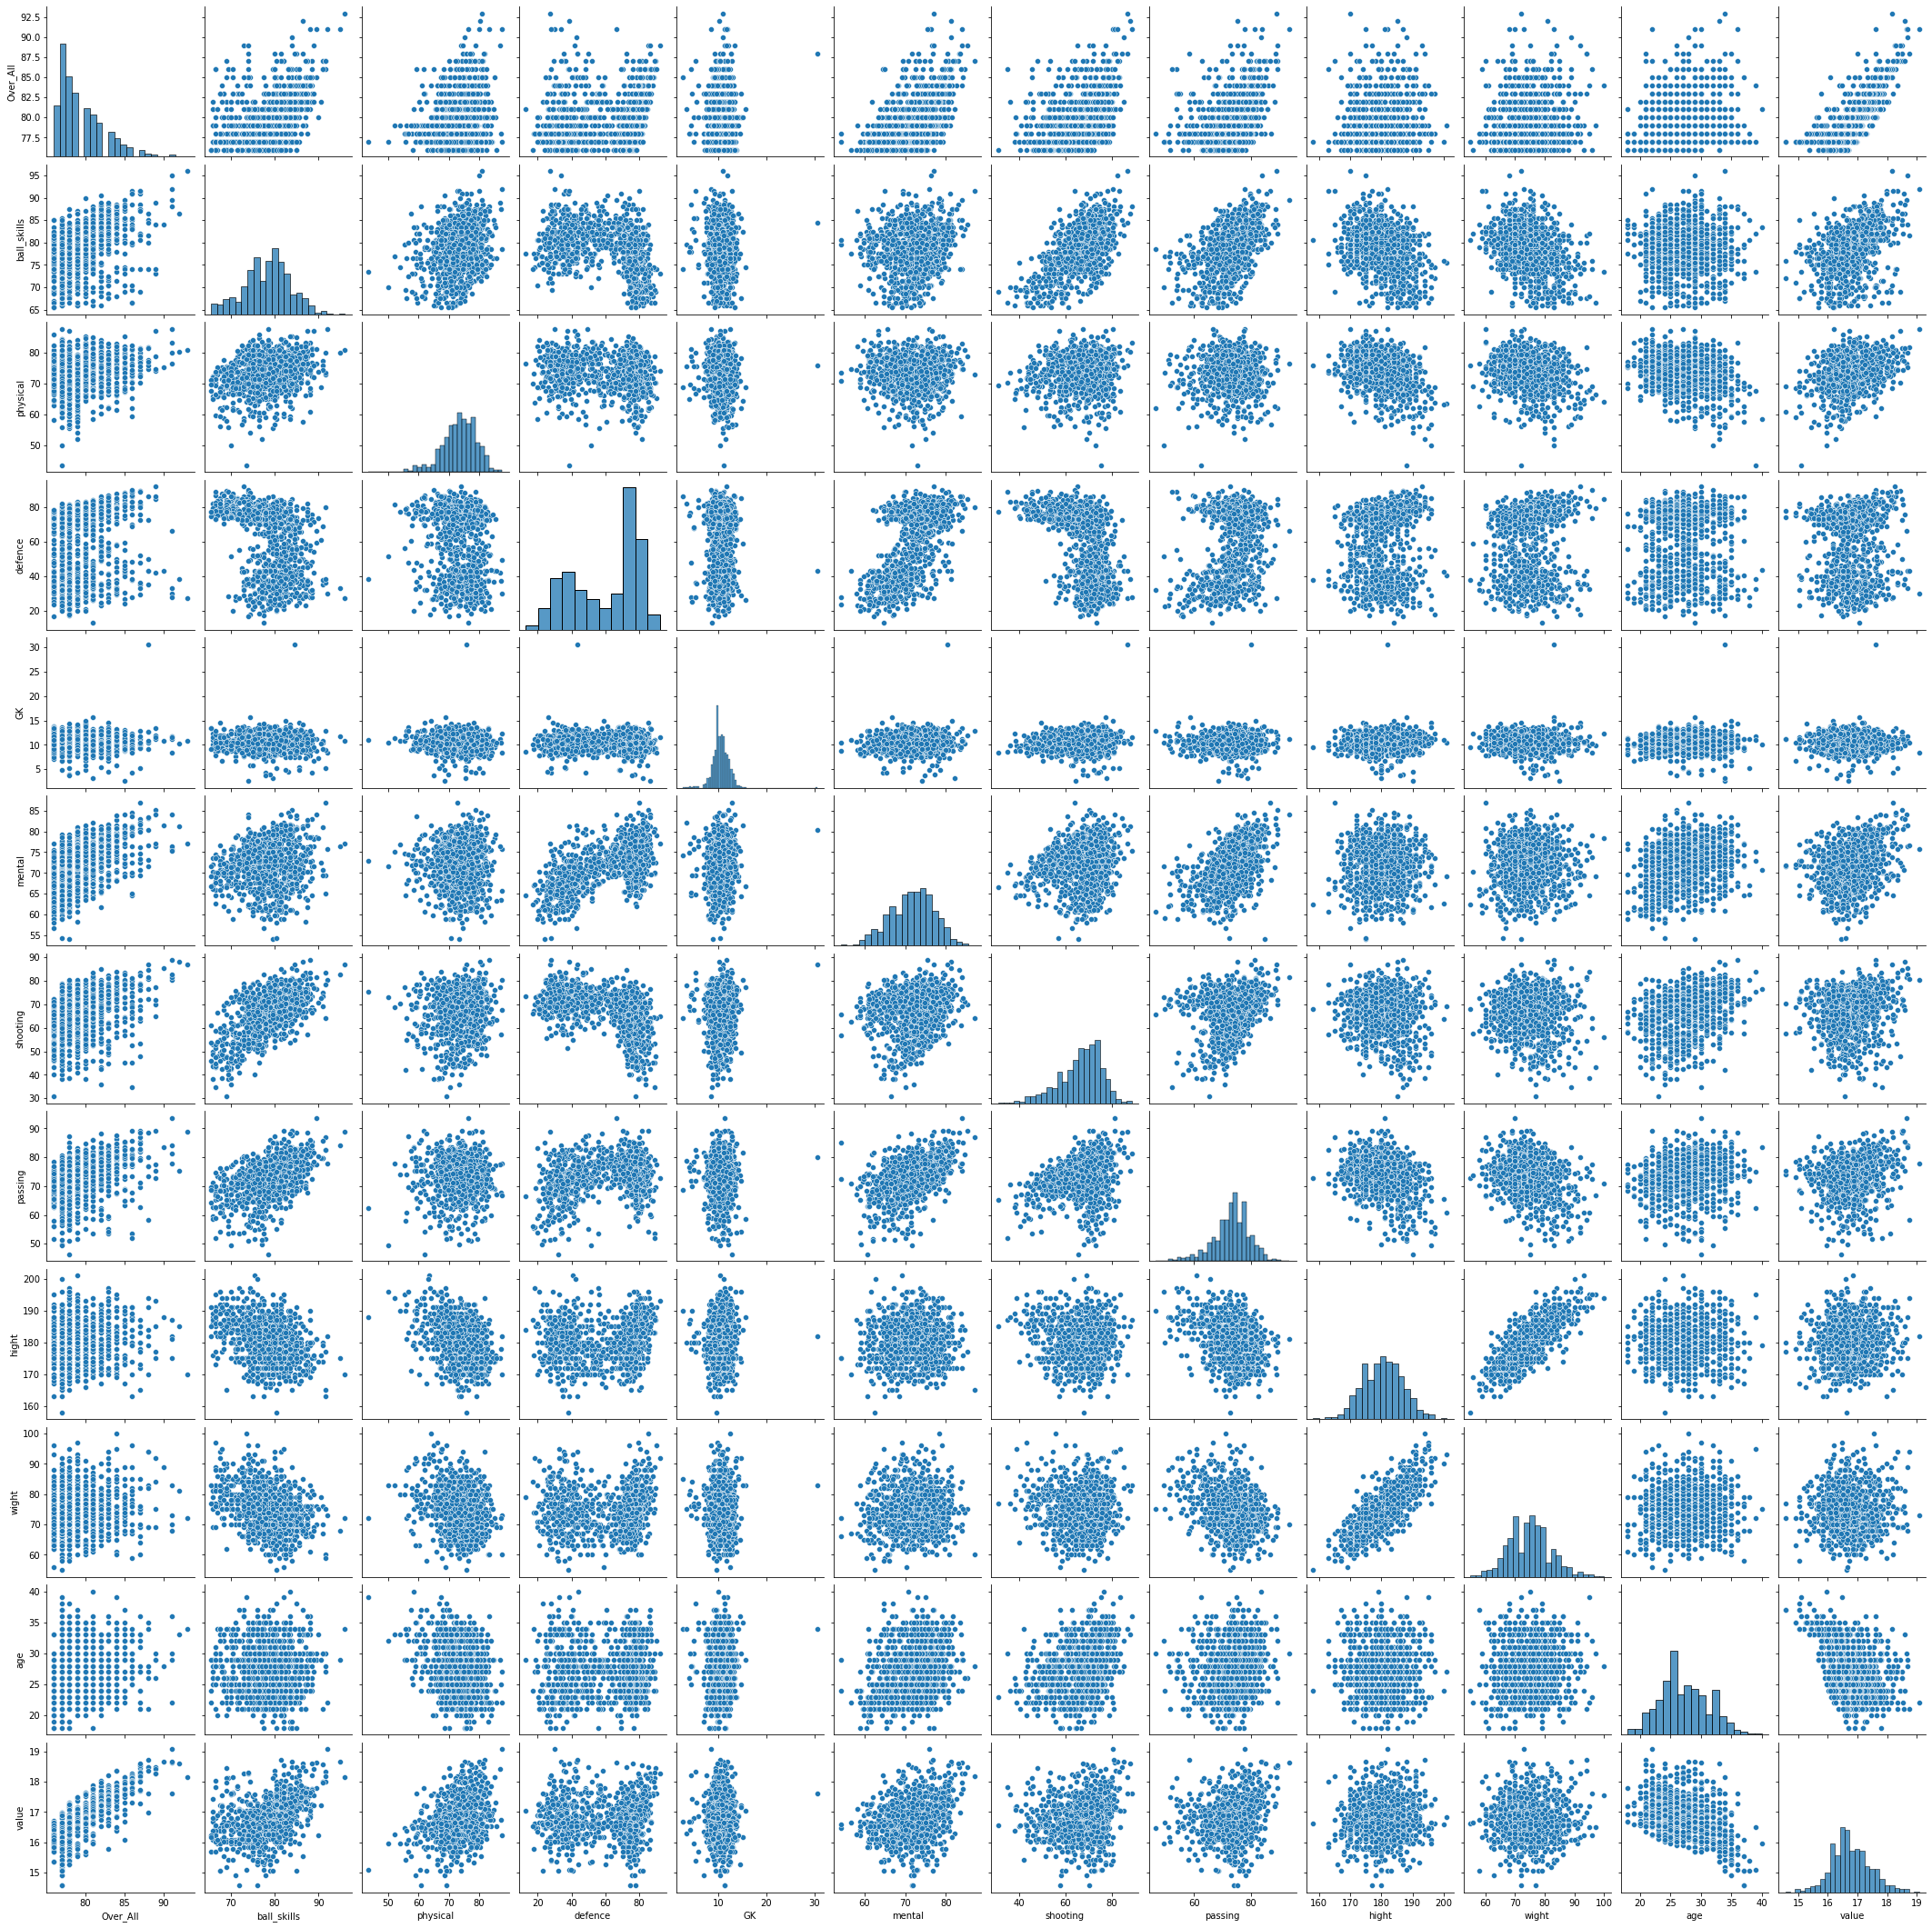

In [10]:
sns.pairplot(mask_df)

- DROPPING OUT THE MULTICOLLINEAR FEATURES.

In [11]:
df.drop(['Over_All', 'hight','wight'], axis=1, inplace=True)

- here we applied LinearRegression

MAE : Mean Absoulte Error 

In [12]:
def MAE(actuals, preds): #mean absolute error
    return np.mean(np.abs(actuals-preds))

In [13]:
# Split into train, val, and test
X, X_test, y, y_test = train_test_split(mask_df[['ball_skills','physical','defence','GK','mental','shooting','passing','age']], mask_df['value'], test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=40)

In [14]:
# Fit a simple linear regression on training set
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.49242702344936884

In [15]:
lr.score(X_val,y_val)

0.36349019617636225

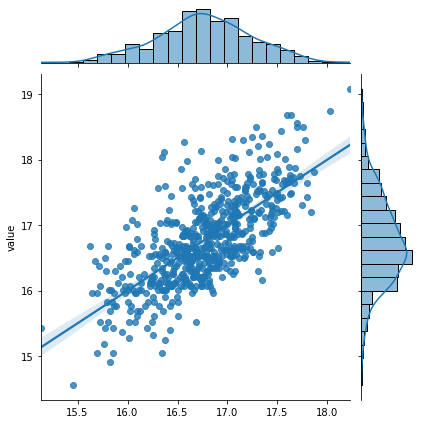

In [16]:
preds_lr = lr.predict(X_train) # generate predictions (on training data) using fit model

sns.jointplot(x=preds_lr,y=y_train, kind='reg')

In [17]:
MAE(y_train,preds_lr)

0.37610887591462994

In [18]:
print(lr.intercept_)
print(lr.coef_)

11.540572194977544
[ 0.02964753  0.01465189 -0.00467913  0.00444636  0.06109154  0.00482088
 -0.00540848 -0.08255125]


- WOW !! VERY BAD COFF.

- APLLYING OLS AND SEE THE SUMMARY.

In [19]:
Y, X = patsy.dmatrices('value ~ball_skills+physical+defence+GK+mental+shooting+passing+age', data=mask_df, return_type="dataframe")

# Create your model
model = sm.OLS(Y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     113.1
Date:                Fri, 15 Oct 2021   Prob (F-statistic):          8.99e-133
Time:                        15:48:55   Log-Likelihood:                -668.88
No. Observations:                 968   AIC:                             1356.
Df Residuals:                     959   BIC:                             1400.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.2645      0.372     30.305      0.000      10.535      11.994
ball_skills     0.0347      0.005      6.756      0.000       0.025       0.045
physical        0.0146      0.003      4.905      0.000       0.009       0.021
defence        -0.0056      0.002     -2.924      0.004      -0.009      -0.002
GK              0.0062      0.009      0.687      0.492      -0.011       0.024
mental          0.0627      0.006     11.228      0.000       0.052       0.074
shooting       -0.0009      0.003     -0.293      0.769      -0.007       0.005
passing        -0.0039      0.004     -1.078      0.281      -0.011       0.003
age            -0.0799      0.005    -17.594      0.000      -0.089      -0.071
==============================================================================
Omnibus:                       61.667   Durbin-Watson:                   0.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.385
Skew:                           0.580   Prob(JB):                     1.57e-17
Kurtosis:                       3.756   Cond. No.                     4.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 - Since we found our R**2 = 0.485, and from the pairplot we found that we can apply polynomial regg to linearise our model. 

-  IN y2 = target variable , and IN X2 WE SAPERATED OUR TARGET VARIABAL  FROM OUR DATAFRAME.

In [20]:
y2 = mask_df['value']
X2 = mask_df.drop(['value','Players Name'],axis=1)

In [21]:

def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 3, 1)
    plt.scatter(pred,y,alpha=0.1)
    plt.plot(y, y, color='red',linewidth=1,)
    plt.title("Regression fit")
    plt.xlabel("Predicted y")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res,alpha=0.1)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    print(res)    
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt,)
    plt.title("Normal Q-Q plot")

0      -0.694956
1      -0.188496
2      -0.566366
4      -0.167750
5      -0.291347
          ...   
1195   -0.170322
1196   -0.150193
1197   -0.107190
1198   -0.298977
1199   -0.191036
Name: value, Length: 968, dtype: float64


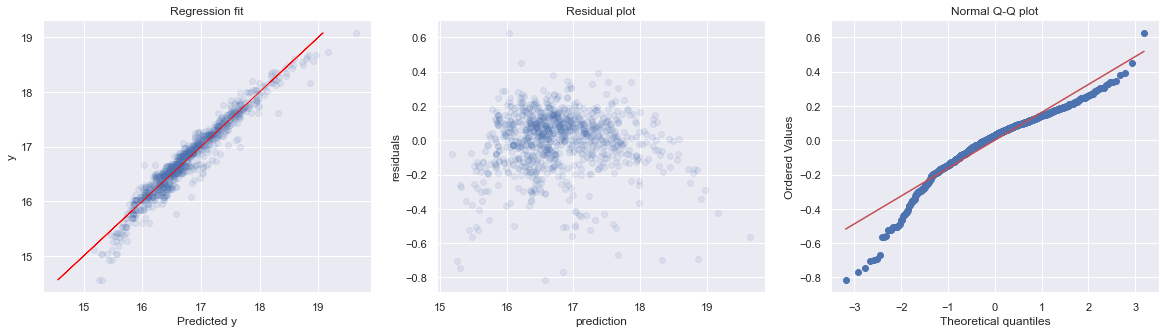

In [22]:
sns.set(style='darkgrid')
diagnostic_plot(X2, y2)

as we see in theoretical quantiles plot , it follows normal distrubation pattren 

# Cross Validation 

- we will take train sample from X which is our feature , and y which is our target value . 
*size of our sample is 20% from our data 

In [23]:
# Split into train, val, and test
X, X_test, y, y_test = train_test_split(mask_df[['ball_skills','physical','defence','GK','mental','shooting','passing','age']], mask_df['value'], test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=40)

In [24]:
X_train

ball_skills   physical  defence    GK     mental  shooting    passing  \
1063         72.0  60.857143     78.0  11.2  71.833333    57.500  75.333333   
677          79.5  69.857143     44.0   8.6  68.333333    62.125  78.666667   
1101         75.5  67.000000     65.0  10.0  70.333333    64.375  76.666667   
714          77.0  80.285714     42.5  11.6  74.166667    74.125  70.333333   
514          79.0  76.000000     25.5   9.8  65.666667    73.750  66.666667   
...           ...        ...      ...   ...        ...       ...        ...   
397          84.0  77.714286     75.0  12.4  76.833333    68.250  79.666667   
362          73.0  71.000000     29.0  12.0  74.166667    78.750  66.333333   
923          82.0  74.714286     46.0   9.6  68.666667    73.000  70.333333   
959          73.0  69.571429     75.0  10.4  74.833333    63.625  74.333333   
1144         82.5  72.000000     35.0  11.0  61.666667    61.250  66.000000   

      age  
1063   37  
677    21  
1101   24  
714    26  
514    23  
...   ...  
397    23  
362    36  
923    25  
959    28  
1144   22  

[619 rows x 8 columns]

In [25]:
X_val

ball_skills   physical  defence    GK     mental  shooting    passing  \
847         75.0  83.857143     21.0   7.8  59.833333    68.000  60.000000   
885         66.5  73.142857     78.0   7.8  62.666667    44.000  59.000000   
696         81.5  81.285714     52.5   8.6  67.333333    68.500  66.333333   
757         77.0  74.000000     74.0  12.2  71.166667    52.875  69.666667   
815         80.5  66.714286     28.0   5.2  64.833333    80.500  72.000000   
..           ...        ...      ...   ...        ...       ...        ...   
845         82.0  73.571429     23.0  11.4  62.000000    67.125  67.333333   
994         79.0  80.428571     26.0  12.0  61.166667    71.125  71.000000   
66          80.5  79.857143     82.0  13.0  79.666667    56.875  79.666667   
303         78.5  82.857143     38.0  13.2  69.500000    72.375  72.000000   
823         70.5  63.857143     74.5   9.0  71.666667    51.375  71.000000   

     age  
847   22  
885   25  
696   26  
757   26  
815   38  
..   ...  
845   22  
994   30  
66    29  
303   27  
823   25  

[155 rows x 8 columns]

In [26]:


poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)



0.7585755411512536

In [27]:
lr_poly.score(X_val_poly, y_val)

0.674015663358905

In [28]:
# preds_lr_poly = poly.predict(X_train) # generate predictions (on training data) using fit model

In [29]:
# MAE(y_train,preds_lr_poly)

In [30]:
lr_poly.coef_

array([ 2.88278632e-14, -1.29583311e-01, -5.07992253e-02,  1.43483623e-01,
       -4.11974563e-01, -1.81933428e-01,  7.85835175e-02, -3.31243096e-01,
        1.39468492e-01,  1.58248520e-03,  3.18461827e-04, -7.81850792e-04,
        1.08876572e-03, -3.31685509e-03, -5.67721675e-04,  2.83440049e-03,
       -1.43195470e-05,  4.84245763e-04, -7.58160574e-05,  1.42115202e-03,
       -4.00299130e-04,  1.89815827e-04, -3.51475479e-04,  1.51806675e-04,
        6.54590879e-04, -4.62390625e-04, -1.22444441e-03, -6.29625498e-04,
       -2.95434414e-04,  2.68579755e-04,  1.19848648e-03,  5.17940747e-03,
       -2.91479434e-04, -8.47068992e-04, -2.27956719e-03,  3.53352274e-03,
        1.94126221e-04,  2.89950538e-04, -8.82569191e-07,  8.38435369e-04,
       -1.65203607e-03,  2.47830406e-04,  1.77784475e-03,  2.11563651e-04,
       -4.93945174e-03])

Standraztion 

In [31]:
scaler = StandardScaler()

X_train_poly_scaled = scaler.fit_transform(X_train_poly)

X_val_poly_scaled = scaler.transform(X_val_poly)

 - WE APPLY LASSO

In [32]:
from sklearn.linear_model import LassoCV, RidgeCV,ElasticNetCV

In [33]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [34]:
params = {"alpha": np.logspace(-4, -.1, 20)}
GS = GridSearchCV(Lasso(), param_grid=params, cv=kf, return_train_score=False)
GS.fit(X_train_poly_scaled, y_train);

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.790923752552313, tolerance: 0.02168821346299919
  model = cd_fast.enet_coordinate_descent(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.340155259482902, tolerance: 0.022256029277222214
  model = cd_fast.enet_coordinate_descent(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.811537990716825, tolerance: 0.02207913815507714
  model = cd_fast.enet_coordinate_descent(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packa

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.201528751248986, tolerance: 0.022256029277222214
  model = cd_fast.enet_coordinate_descent(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7555373038987696, tolerance: 0.02207913815507714
  model = cd_fast.enet_coordinate_descent(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7814039606709144, tolerance: 0.023460468554984883
  model = cd_fast.enet_coordinate_descent(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packa

In [35]:
lasso = LassoCV(GS.best_estimator_.alpha)
lasso.fit(X_train_poly_scaled,y_train)
lasso.score(X_train_poly_scaled,y_train)

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass eps=0.0006622967617148325 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13495873103542522, tolerance: 0.021755525404576998
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1926511866857581, tolerance: 0.021755525404576998
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03161682223046114, tolerance: 0.023429062727838082
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.168864210048838, tolerance: 0.023429062727838082
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17592486631815518, tolerance: 0.023429062727838082
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/py

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.21023971677290376, tolerance: 0.021694317181217025
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.26441707512346113, tolerance: 0.021694317181217025
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3341530623182294, tolerance: 0.021694317181217025
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/p

0.7455160599086536

In [36]:
# Score on validation set
lasso.score(X_val_poly_scaled, y_val)

0.6865483221166255

In [37]:
list(zip(poly.get_feature_names(['ball_skills','physical','defence','GK','mental','shooting','passing','age']),lasso.coef_))

[('1', 0.0),
 ('ball_skills', -1.5368600294466885),
 ('physical', -0.07136817831386924),
 ('defence', 0.4033404271398937),
 ('GK', -0.23498488629318048),
 ('mental', -0.3954925970119804),
 ('shooting', -0.10910539435386765),
 ('passing', -0.9363225931869873),
 ('age', 0.3386579412071157),
 ('ball_skills^2', 1.8323189440308887),
 ('ball_skills physical', 0.04418120285394749),
 ('ball_skills defence', -0.6970707875322643),
 ('ball_skills GK', 0.0),
 ('ball_skills mental', -0.3363175524189686),
 ('ball_skills shooting', -0.0),
 ('ball_skills passing', 0.3721127562555365),
 ('ball_skills age', 0.12836799824142142),
 ('physical^2', 0.2806267653470801),
 ('physical defence', -0.0),
 ('physical GK', 0.0),
 ('physical mental', -0.05437737569228254),
 ('physical shooting', 0.005301823748786661),
 ('physical passing', -0.16884631222731467),
 ('physical age', 0.0),
 ('defence^2', 1.2670525169721771),
 ('defence GK', -0.0),
 ('defence mental', 0.038737000748929905),
 ('defence shooting', -0.874212

In [38]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

lasso = LassoCV(GS.best_estimator_.alpha)
lasso.fit(X_poly_scaled,y)

# Apply the same polynomial and scaling transformations to test set, then score
X_test_poly = poly.transform(X_test)
X_test_poly_scaled = scaler.transform(X_test_poly)

lasso.score(X_test_poly_scaled, y_test)

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass eps=0.0006622967617148325 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07815487319408021, tolerance: 0.02714287931017567
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1694806112405729, tolerance: 0.02714287931017567
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.24373425284318273, tolerance: 0.02560539720846365
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.23447134310626438, tolerance: 0.02560539720846365
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.22461073243277951, tolerance: 0.02560539720846365
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/pyt

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.16738346862938158, tolerance: 0.027253437907845884
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2584360250693294, tolerance: 0.027253437907845884
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2324411476474353, tolerance: 0.027253437907845884
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/py

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.21512354208846318, tolerance: 0.025749990864614637
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.33417055936762097, tolerance: 0.025749990864614637
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4432703433029843, tolerance: 0.025749990864614637
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/p

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.126411397473305, tolerance: 0.0265627631430986
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2663019716344621, tolerance: 0.0265627631430986
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.37857983712871146, tolerance: 0.0265627631430986
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8

0.7685714615514059

847    0.000222
885   -0.214994
696    0.050299
757    0.005824
815   -0.120242
         ...   
845   -0.533630
994   -0.024669
66     0.150872
303    0.486301
823    0.141843
Name: value, Length: 155, dtype: float64


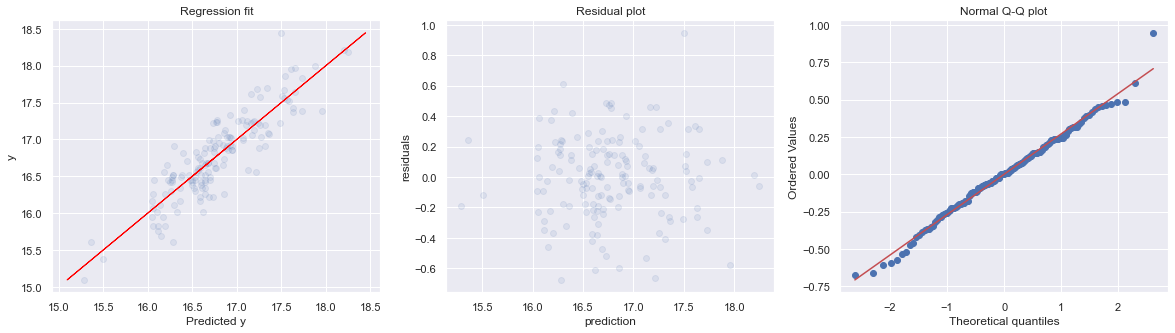

In [39]:
sns.set(style='darkgrid')
diagnostic_plot(X_val_poly_scaled, y_val)

RidgeCV

In [40]:
ridge = RidgeCV(GS.best_estimator_.alpha)
ridge.fit(X_train_poly_scaled,y_train)
ridge.score(X_train_poly_scaled,y_train)

0.7585747477244504

In [41]:
ridge.score(X_val_poly_scaled, y_val)

0.6742489784729794

In [42]:


list(zip(poly.get_feature_names(['ball_skills','physical','defence','GK','mental','shooting','passing','age']),ridge.coef_))



[('1', 0.0),
 ('ball_skills', -0.6786590761215621),
 ('physical', -0.2929541513213394),
 ('defence', 2.8134641920608487),
 ('GK', -0.657256425038895),
 ('mental', -0.964895541405383),
 ('shooting', 0.6897574834654989),
 ('passing', -2.214339252933911),
 ('age', 0.5643843678822691),
 ('ball_skills^2', 1.2867116558835505),
 ('ball_skills physical', 0.20833840449437702),
 ('ball_skills defence', -1.1348755860977349),
 ('ball_skills GK', 0.14668359875707893),
 ('ball_skills mental', -1.966168263895696),
 ('ball_skills shooting', -0.5310391430548052),
 ('ball_skills passing', 2.192175202080918),
 ('ball_skills age', -0.007069718371724321),
 ('physical^2', 0.39965569315114635),
 ('physical defence', -0.10865534356588569),
 ('physical GK', 0.1850844497512938),
 ('physical mental', -0.2328102282322675),
 ('physical shooting', 0.15230217579451732),
 ('physical passing', -0.22562232599065624),
 ('physical age', 0.04540183291123867),
 ('defence^2', 1.4376692316201911),
 ('defence GK', -0.10607704

In [43]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

ridge = RidgeCV(GS.best_estimator_.alpha)
ridge.fit(X_poly_scaled,y)

# Apply the same polynomial and scaling transformations to test set, then score
X_test_poly = poly.transform(X_test)
X_test_poly_scaled = scaler.transform(X_test_poly)

ridge.score(X_test_poly_scaled, y_test)

0.7499618406837549

ElasticNetCV

In [44]:
elastic = ElasticNetCV(GS.best_estimator_.alpha)
elastic.fit(X_train_poly_scaled,y_train)
elastic.score(X_train_poly_scaled,y_train)

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass l1_ratio=0.0006622967617148325 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.5060167040623813

In [45]:
elastic.score(X_val_poly_scaled, y_val)

0.40529532288910497

In [46]:


list(zip(poly.get_feature_names(['ball_skills','physical','defence','GK','mental','shooting','passing','age'])
         ,elastic.coef_))



[('1', 0.0),
 ('ball_skills', 0.02860871453977615),
 ('physical', 0.015906847202891),
 ('defence', 0.0),
 ('GK', -0.0008966456748105588),
 ('mental', 0.05533601046088916),
 ('shooting', 0.002660165745245784),
 ('passing', -0.0146008050942497),
 ('age', -0.0537098643795206),
 ('ball_skills^2', 0.04483446009098926),
 ('ball_skills physical', 0.0394262360326556),
 ('ball_skills defence', -0.013033105311911184),
 ('ball_skills GK', 0.0073760685754418985),
 ('ball_skills mental', 0.060102237086541666),
 ('ball_skills shooting', 0.034039117492300514),
 ('ball_skills passing', 0.017932603326221482),
 ('ball_skills age', -0.03319964146972308),
 ('physical^2', 0.02007130611928225),
 ('physical defence', -0.0062205907175900375),
 ('physical GK', 0.003402250903916242),
 ('physical mental', 0.05238772192731393),
 ('physical shooting', 0.022491564277482133),
 ('physical passing', 0.007819846297934401),
 ('physical age', -0.039711803079181825),
 ('defence^2', 0.04305440365659793),
 ('defence GK', 0.

In [47]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)


elastic.fit(X_poly_scaled,y)

# Apply the same polynomial and scaling transformations to test set, then score
X_test_poly = poly.transform(X_test)
X_test_poly_scaled = scaler.transform(X_test_poly)

elastic.score(X_test_poly_scaled, y_test)

0.5120679547001027

# 

In [48]:
poly = make_pipeline(PolynomialFeatures(2), lasso)
poly.fit(X_train,y_train)
predicted = poly.predict(X_val)
predicted
np.exp(predicted)

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08884133308046671, tolerance: 0.021755525404576998
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10458426471346627, tolerance: 0.021755525404576998
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.19922876876050566, tolerance: 0.021755525404576998
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08258814501346023, tolerance: 0.02236296188717941
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08696918080869409, tolerance: 0.02236296188717941
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08396390121453123, tolerance: 0.02236296188717941
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/pyt

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2853642025742218, tolerance: 0.023429062727838082
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4254675162087409, tolerance: 0.023429062727838082
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6618861860480081, tolerance: 0.023429062727838082
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/pyt

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9915869739012066, tolerance: 0.022437105053576666
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3493366132638585, tolerance: 0.022437105053576666
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.695579918798643, tolerance: 0.022437105053576666
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ezzowali/opt/anaconda3/lib/pyth

array([26578358.0218482 , 11509938.50695038, 15764991.2638218 ,
       16603222.75110544,  5905467.38226974, 30717048.93992436,
       14436421.56190789, 10070120.9235568 ,  8632339.57777312,
       31748583.50769663, 74167693.25945254, 14678609.38606207,
       28693826.84251093, 25207761.15693285, 15883228.42787577,
       27105012.8134806 , 34846467.23758214, 12464779.87892998,
       14969348.18779455, 26819115.81113869, 29412408.62537755,
       18908496.31636155, 10035260.87900766, 24403958.65033429,
       16930583.82654119, 21153085.06455803, 29087827.98846618,
       16718248.69188057, 30992902.21063607, 44417007.38039552,
       23238536.06674635, 15445600.4498    , 25754869.08047623,
       36503711.29836118, 19749987.43326429, 18189316.75616163,
       34838329.50333393, 24710894.53678509, 10190564.12571986,
       21734711.94029689, 16040401.6729354 , 28756805.4097521 ,
       22647049.44120695, 16922820.916214  , 11293917.6543833 ,
       49714467.98534633, 12848499.56346

1182    0.189341
712    -0.300979
574     0.582783
583     1.709112
968    -0.548417
          ...   
950     0.304108
517    -0.104046
132    -1.003446
4       2.239589
616    -4.064781
Name: value, Length: 194, dtype: float64


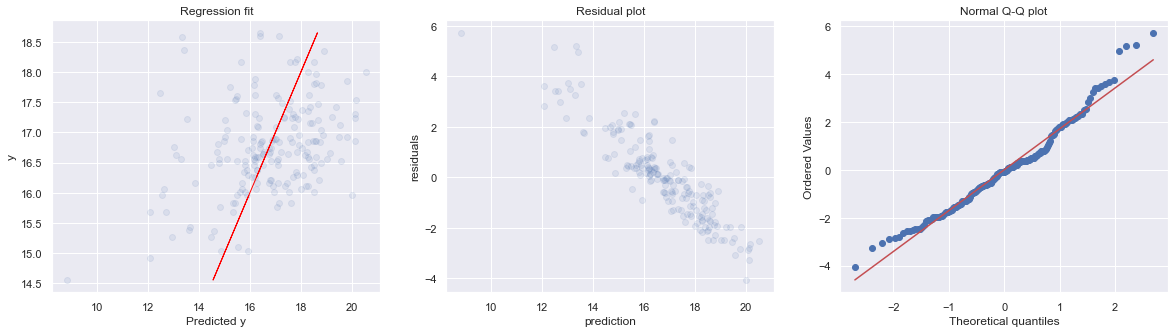

In [49]:
sns.set(style='darkgrid')
diagnostic_plot(X_test_poly_scaled, y_test)

In [50]:
def diagnostic_plot2(x_train, y_train, x_test, y_test):
    plt.figure(figsize=(22,8))
    
  
    
    rgr = LinearRegression()
    rgr.fit(x_train,y_train)
    pred = rgr.predict(x_test)    

    plt.subplot(1, 2, 1)
    plt.scatter(pred,y_test,alpha=0.1)
    plt.plot(y_test, y_test, color='red',linewidth=1,label='Identity Line (Log Market Value)')
    plt.title("Regression Fit on Test Set",weight='bold')
    plt.xlabel("Log Predicted Market Value")
    plt.ylabel("Log Market Value")
    plt.legend(loc='lower right')
    sns.despine()
    
    plt.subplot(1, 2, 2)
    res = np.array(y_test).reshape(-1,1) - pred
    plt.scatter(pred, res,alpha=0.1)
    plt.title("Residual Plot on Test Set",weight='bold')
    plt.xlabel("Log Predicted Market Value")
    plt.ylabel("Residuals")
    sns.despine()

1182    0.189341
712    -0.300979
574     0.582783
583     1.709112
968    -0.548417
          ...   
950     0.304108
517    -0.104046
132    -1.003446
4       2.239589
616    -4.064781
Name: value, Length: 194, dtype: float64


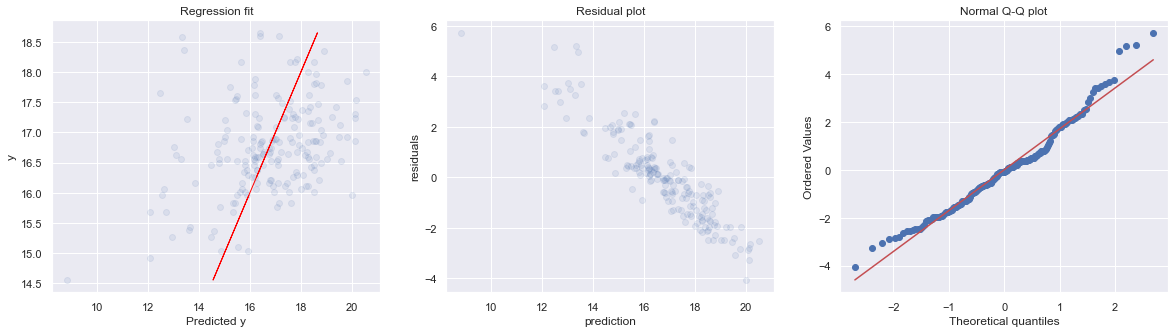

In [51]:


sns.set(style='darkgrid')
diagnostic_plot(X_test_poly_scaled, y_test)


# Final Prediction 

In [52]:
poly = make_pipeline(PolynomialFeatures(2), Lasso())
poly.fit(X_train,y_train)
predicted = poly.predict(X_val)
predicted
np.exp(predicted)

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.02253240343137, tolerance: 0.027960718848702437
  model = cd_fast.enet_coordinate_descent(


array([25369807.25661227, 10662417.79504482, 15308630.93496678,
       16651666.17582534,  7833955.21379668, 31486476.31649729,
       12352848.15164533, 10620252.77785875,  9432912.23147824,
       30588750.78144174, 56137675.1310908 , 14655102.60979124,
       25375662.64772905, 25196023.86778471, 15503417.0049068 ,
       18755963.83018468, 33741684.08443201, 12864490.61220301,
       15827899.44609011, 27776398.64787103, 26776830.92809969,
       20609404.97994789,  9965652.42140493, 23756804.67140782,
       17828486.42374052, 21427377.37059845, 29146186.2544123 ,
       16971357.3512417 , 33102035.447822  , 45412873.94518268,
       23128078.83384739, 16019731.43985393, 25688543.48937362,
       36251902.74278244, 20051486.35041545, 19222773.02377417,
       34132094.54022792, 28596559.0871362 , 10253914.26818399,
       23456678.28687375, 15644116.24119863, 29248744.71000153,
       23979403.64524128, 16461286.05223905, 11478769.67393564,
       50425871.28923149, 13535800.84733

In [53]:
Test_Set = pd.DataFrame(y_val).join(X_val).join(pd.DataFrame(mask_df['Players Name']))
Test_Set['Log Market Value'] = np.exp(Test_Set['value'] )
Test_Set = Test_Set.rename(columns={'value':'Market Value'})
Test_Set['Predicted Market Value'] = np.exp(predicted)
Test_Set = Test_Set.sort_values(by='Predicted Market Value',ascending=False)

Test_Set['Real Value'] = np.exp(Test_Set['Market Value'])



Test_Set = Test_Set[['Players Name','Market Value','Real Value','Predicted Market Value','age','defence','passing','physical','shooting','GK']]
Test_Set.reset_index(inplace=True)
Test_Set.drop('index',axis=1,inplace=True)
Test_Set

Players Name  Market Value  Real Value  Predicted Market Value  \
0        Marco Verratti     18.191268  79500000.0            8.325788e+07   
1        Nicolò Barella     17.966550  63500000.0            6.604952e+07   
2        Kingsley Coman     18.209960  81000000.0            5.613768e+07   
3       Andrej Kramarić     17.385043  35500000.0            5.541661e+07   
4              Emre Can     17.370859  35000000.0            5.042587e+07   
..                  ...           ...         ...                     ...   
150             Montoro     15.955577   8500000.0            7.964726e+06   
151  Fabio Quagliarella     15.384126   4800000.0            7.833955e+06   
152         Ömer Toprak     15.761421   7000000.0            7.754634e+06   
153             Negredo     15.607270   6000000.0            5.626243e+06   
154        Jorge Molina     15.096444   3600000.0            3.018157e+06   

     age  defence    passing   physical  shooting    GK  
0     28     80.0  87.000000  72.857143    64.000  12.8  
1     24     74.5  78.000000  82.714286    69.125  10.8  
2     25     28.0  77.666667  81.142857    73.625   4.2  
3     30     27.5  73.333333  75.571429    82.250  11.6  
4     27     84.0  78.333333  80.285714    74.500  10.8  
..   ...      ...        ...        ...       ...   ...  
150   33     77.0  74.000000  56.142857    64.000  12.8  
151   38     28.0  72.000000  66.714286    80.500   5.2  
152   32     81.5  63.000000  68.428571    46.125  11.4  
153   36     32.0  60.333333  68.142857    77.250   9.6  
154   39     38.5  62.333333  43.571429    75.500  11.0  

[155 rows x 10 columns]

In [54]:
MAE(Test_Set['Real Value'],Test_Set['Predicted Market Value'])

5896453.436668473

In [55]:
Test_Set['Predicted Market Value']

0      8.325788e+07
1      6.604952e+07
2      5.613768e+07
3      5.541661e+07
4      5.042587e+07
           ...     
150    7.964726e+06
151    7.833955e+06
152    7.754634e+06
153    5.626243e+06
154    3.018157e+06
Name: Predicted Market Value, Length: 155, dtype: float64

In [56]:
y_final = Test_Set['Real Value']
X_final = Test_Set.drop(['Real Value','Players Name'],axis=1)

In [57]:
# Fit a simple linear regression on training set
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.49242702344936884

In [58]:
poly = make_pipeline(PolynomialFeatures(1), LinearRegression())
poly.fit(X_train_poly,y_train)
predicted = poly.predict(X_test_poly)
print('R2 score on test set is: {}'.format(r2_score(y_test, predicted)))

R2 score on test set is: 0.7473012340234273


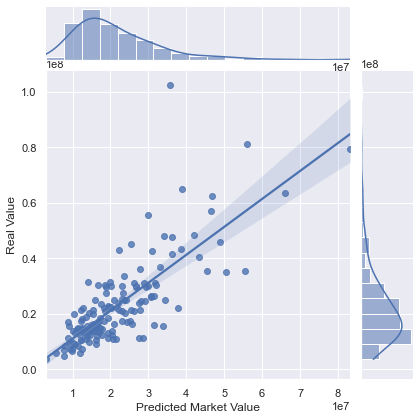

In [59]:
sns.jointplot(x=Test_Set['Predicted Market Value'],y=Test_Set['Real Value'], kind='reg')